# Análisis de los perfiles de intensidad

### Se importan las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal

### Se definen funciones importantes

In [2]:
diccionario_indices_valles = {}
def scatter(dataframe, distancia, mitad, dicc, indice):
    valles = signal.argrelextrema(dataframe["Gray_Value"].values, np.less, order=18)
    indices_valles = valles[0]
    dataframe.plot(x="Distance_(mm)",
                   y="Gray_Value",
                   grid=True,
                   title=f"Perfil de Intensidad del Patrón de Interfetencia\na una distancia de {distancia}",
                   ylabel="Intensidad Lumínica (z)",
                   xlabel="Posición [cm] (x)",
                   linewidth=0.75,
                   label="Intensidad"
                  )
    plt.plot(dataframe["Distance_(mm)"][indices_valles], dataframe["Gray_Value"][indices_valles], "x", label="mínimos relativos")
    plt.legend()
    plt.savefig(f'graficas/perfil_intensidad_distancia_{distancia}_con_minimos.png')
    plt.show()
    posiciones = dataframe["Distance_(mm)"][indices_valles]
    posiciones_izquierda = posiciones[:mitad]
    posiciones_derecha = posiciones[mitad:]
    promedio_distancias_izquierda = posiciones_izquierda.diff().mean()
    promedio_distancias_derecha = posiciones_derecha.diff().mean()
    
    promedio_distancias = pd.Series(np.array([promedio_distancias_izquierda, promedio_distancias_derecha])).mean()
    desv_est_promedio_distancia = pd.Series(np.array([promedio_distancias_izquierda, promedio_distancias_derecha])).std()
    dicc[f"{indice}"] = promedio_distancias
    print(f"La distancia entre mínimos $\Delta z$ medida es: {promedio_distancias:.3f} +/- {desv_est_promedio_distancia:.3f} nm")
    print(f"El error porcentual es: {desv_est_promedio_distancia / promedio_distancias * 100:.3f}%")
    

In [3]:
def longitud_de_onda(delta_z, d, D):
    return delta_z * d / D

### Se leen los .csv's obtenidos

In [4]:
lista_dataframes = [pd.read_csv(f"../imagej/laser_verde/data_perfil_intensidad/{i}.dat", sep="\t") for i in range(1, 9)]

In [5]:
lista_Distancias = [222.8, 214.2, 200.1, 184.4, 170.45, 167.8, 159.4, 154.5, 149.4, 138.3]
primera_parte = [7, 7, 6, 6, 8, 11, 8, 13]

### Se muestran las gráficas con los mínimos relativos y la distancia entre estos $\Delta z$

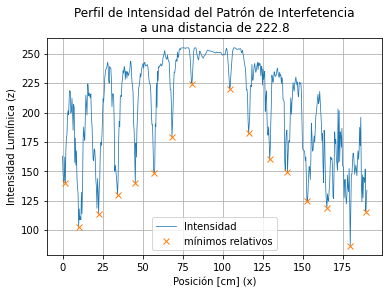

La distancia entre mínimos $\Delta z$ medida es: 12.342 +/- 1.748 nm
El error porcentual es: 14.167%


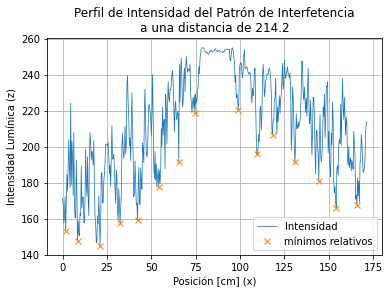

La distancia entre mínimos $\Delta z$ medida es: 11.821 +/- 1.701 nm
El error porcentual es: 14.388%


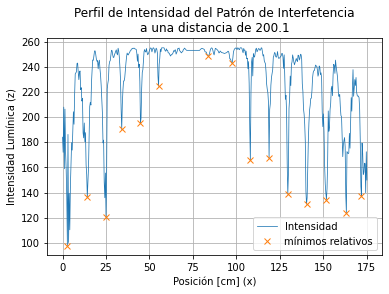

La distancia entre mínimos $\Delta z$ medida es: 10.757 +/- 0.381 nm
El error porcentual es: 3.538%


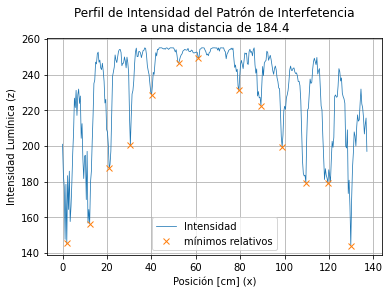

La distancia entre mínimos $\Delta z$ medida es: 10.771 +/- 0.972 nm
El error porcentual es: 9.027%


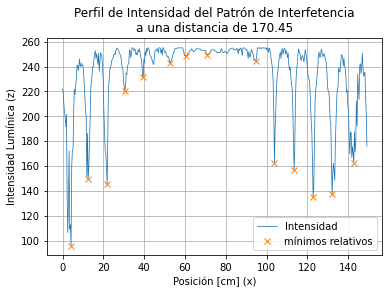

La distancia entre mínimos $\Delta z$ medida es: 9.540 +/- 0.052 nm
El error porcentual es: 0.544%


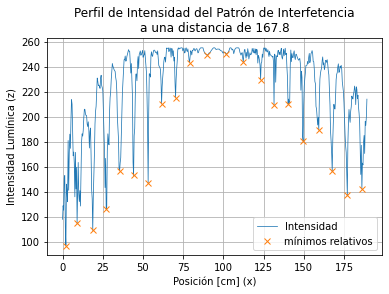

La distancia entre mínimos $\Delta z$ medida es: 9.079 +/- 0.443 nm
El error porcentual es: 4.876%


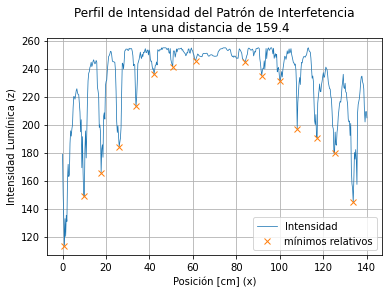

La distancia entre mínimos $\Delta z$ medida es: 8.467 +/- 0.231 nm
El error porcentual es: 2.733%


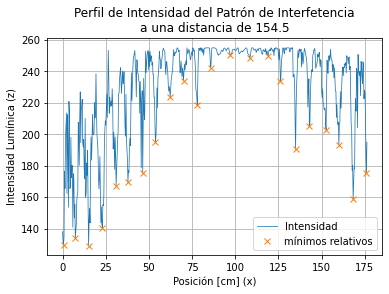

La distancia entre mínimos $\Delta z$ medida es: 8.237 +/- 0.277 nm
El error porcentual es: 3.360%


In [6]:
for i in range(8):
    scatter(lista_dataframes[i], lista_Distancias[i], primera_parte[i], diccionario_indices_valles, i)

In [7]:
lista_distancia_minimos = [diccionario_indices_valles[f"{i}"] for i in range(8)]

In [8]:
deltas_df = pd.DataFrame(list(zip(lista_Distancias,lista_distancia_minimos)), columns = ['Distancia_mm','Delta_z_mm'])
distancia_rendijas = 1.0

### Se obtiene la longitud de onda del haz

In [9]:
deltas_df["longitud_de_onda_nm"] = pd.Series(np.diag(deltas_df["Delta_z_mm"].apply(longitud_de_onda, args=(distancia_rendijas, deltas_df["Distancia_mm"], ))) * 10000)

In [10]:
deltas_df

,Distancia_mm,Delta_z_mm,longitud_de_onda_nm
0,222.80,12.342375,553.966562
1,214.20,11.820798,551.857965
2,200.10,10.756737,537.568091
3,184.40,10.770500,584.083514
4,170.45,9.539871,559.687382
5,167.80,9.078528,541.032645
6,159.40,8.467107,531.186144
7,154.50,8.237437,533.167476


In [11]:
promedio_total_longitud_de_onda = deltas_df["longitud_de_onda_nm"].mean()
error_longitud_de_onda = deltas_df["longitud_de_onda_nm"].std()
print(f"La longitud de onda medida es: {promedio_total_longitud_de_onda:.3f} +/- {error_longitud_de_onda:.3f} nm")
print(f"El error porcentual es: {error_longitud_de_onda / promedio_total_longitud_de_onda * 100:.3f}%")

La longitud de onda medida es: 549.069 +/- 17.485 nm
El error porcentual es: 3.184%
